In [1]:
import os
import sys
import time
import shutil
import logging
import argparse
import yaml
import traceback

import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
pwd

'/atlas/u/kechoi/multi-fairgen/notebooks'

In [4]:
cd ../

/atlas/u/kechoi/multi-fairgen


In [5]:
cd src/flows/

/atlas/u/kechoi/multi-fairgen/src/flows


# Dataset

In [6]:
import torch
from torch.distributions import Normal

In [14]:
p = Normal(0, 1)
q = Normal(3, 1)

In [21]:
px = p.sample((2000,2))
qx = q.sample((200,2))

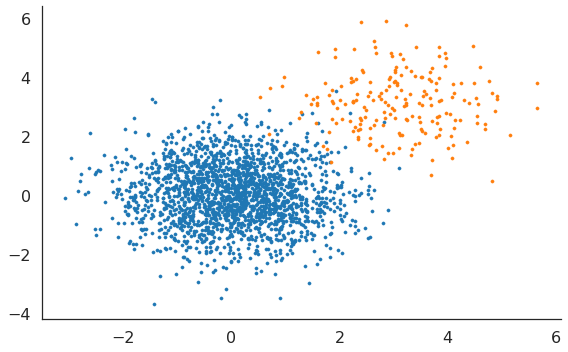

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(px[:,0], px[:,1], label='px', s=10)
plt.scatter(qx[:,0], qx[:,1], label='qx', s=10)

plt.tight_layout()
sns.despine()

In [23]:
xs = torch.cat([px, qx])
xs.shape

torch.Size([2200, 2])

In [24]:
ratios = torch.exp((q.log_prob(xs).sum(-1) - p.log_prob(xs).sum(-1)))

In [25]:
log_ratios = torch.log(ratios)

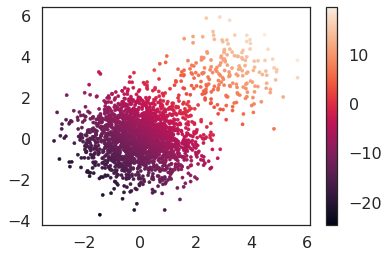

In [26]:
plt.scatter(xs[:,0].data.cpu().numpy(), xs[:,1].data.cpu().numpy(), s=10, c=log_ratios.data.cpu().numpy())
plt.colorbar()

In [ ]:
_ = plt.hist(ratios, bins=50)